<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/LINEAR_REGRESSION_USING_PAST_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')

In [ ]:
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

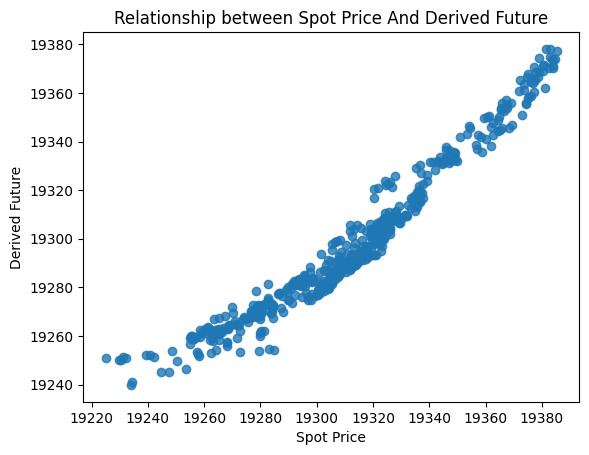

In [ ]:
plt.scatter(data['Spot price ltp NIFTY50'],data['Price of Synthetic option derived future'],alpha=0.8)
plt.title('Relationship between Spot Price And Derived Future')
plt.xlabel('Spot Price')
plt.ylabel('Derived Future')
plt.show()

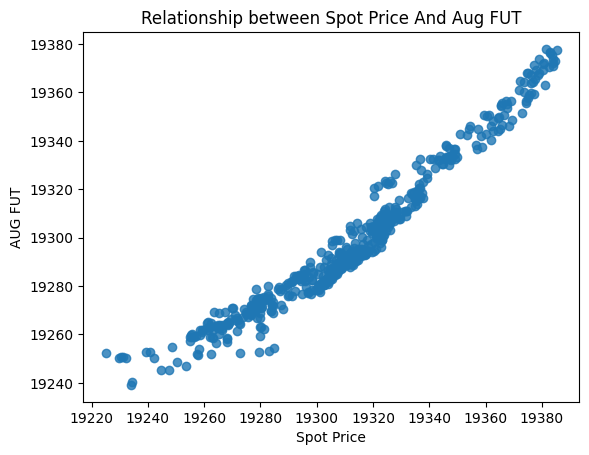

In [ ]:
plt.scatter(data['Spot price ltp NIFTY50'],data['price NIFTY23AUGFUT'],alpha=0.8)
plt.title('Relationship between Spot Price And Aug FUT')
plt.xlabel('Spot Price')
plt.ylabel('AUG FUT')
plt.show()

In [ ]:
#print(data['Spot price ltp NIFTY50'].iloc[0])

data['spot price past values']=data['Spot price ltp NIFTY50'].rolling(window=2).mean()
data.fillna(data['Spot price ltp NIFTY50'].iloc[0],inplace=True)

In [ ]:
X = data[['price NIFTY23AUGFUT','Price of Synthetic option derived future','spot price past values']].values
y = data['Spot price ltp NIFTY50'].values



In [ ]:
size = int(len(X) * 0.66)
x_train, x_test = X[0:size], X[size:len(X)]
y_train,y_test=y[0:size], y[size:len(X)]
history = [x for x in x_train]
predictions = list()
scaler=StandardScaler()
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)

In [ ]:
regressor=LinearRegression()
model=regressor.fit(X_train_normalized,y_train)

In [ ]:
regressor.intercept_,regressor.coef_

(19328.164673913037, array([ 1.78214617,  0.87552315, 22.154507  ]))

In [ ]:
y_pred_train=regressor.predict(X_train_normalized)

In [ ]:
y_pred=regressor.predict(X_test_normalized)

In [ ]:
mean_squared_error(y_test, y_pred)

6.33573979765576

In [ ]:
mean_squared_error(y_train, y_pred_train)

2.5555167937462393

In [ ]:
r2_score(y_train, y_pred_train)

0.9958528737443728

In [ ]:
r2_score(y_pred, y_test)


0.9827355514656878

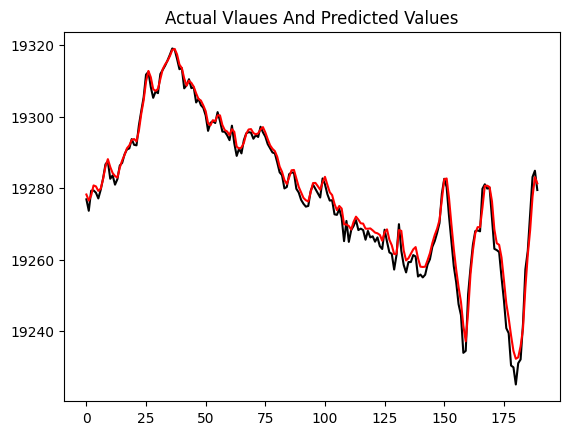

In [ ]:
plt.plot(y_test,color='black')
plt.plot(y_pred, color='red')
plt.title("Actual Vlaues And Predicted Values")
plt.show()

In [ ]:
# prompt: how to find Adjusted R2 for the above model

Adjusted_R2=1 - (mean_squared_error(y_test, y_pred) / mean_squared_error(y_test, y_train))


ValueError: ignored